In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
# For loading the train and test datasets
def load_dataset():
      #load dataset
      (trainX, trainY), (testX, testY) = mnist.load_data()
      #reshape dataset to have a single channel
      trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
      testX = testX.reshape((testX.shape[0], 28, 28, 1))
      # one hot encode target values
      trainY = to_categorical(trainY)
      testY = to_categorical(testY)
      return trainX, trainY, testX, testY

In [3]:
trainX, trainY, testX, testY = load_dataset()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# scale pixels
def prep_pixels(train, test):
      # convert from integers to floats
      train_norm = train.astype('float32')
      test_norm = test.astype('float32')
      #normalize to range 0-1
      train_norm = train_norm / 255.0
      test_norm = test_norm / 255.0
      #return normalized images
      return train_norm, test_norm

In [5]:
trainX, testX = prep_pixels(trainX, testX)


In [6]:
#define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    #compile model
    opt = SGD(lr = 0.01, momentum = 0.9)
    model.compile(optimizer = opt, loss='categorical_crossentropy', metrics = ['accuracy'])
    return model

In [7]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
469/469 [==============================] - 14s 5ms/step - loss: 0.2587 - accuracy: 0.9224 - val_loss: 0.1180 - val_accuracy: 0.9641
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1112 - accuracy: 0.9673 - val_loss: 0.0826 - val_accuracy: 0.9743
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0771 - accuracy: 0.9773 - val_loss: 0.0684 - val_accuracy: 0.9778
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0587 - accuracy: 0.9823 - val_loss: 0.0586 - val_accuracy: 0.9806
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0532 - val_accuracy: 0.9815
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0631 - val_accuracy: 0.9775
Epoch 7/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.0457 - val_accuracy: 0.9844
Epoch

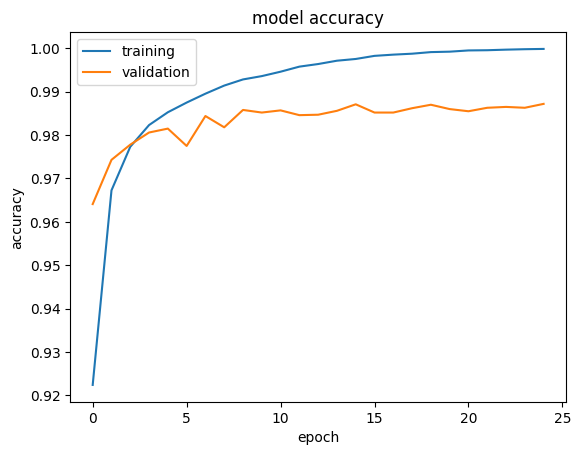

In [8]:
history = model.fit(trainX, trainY, epochs = 25 , batch_size = 128, validation_data = (testX, testY), verbose = 1)

loss, accuracy = model.evaluate(testX,testY, verbose = True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc = 'best')
plt.show()


313/313 [==============================] - 1s 3ms/step - loss: 0.0429 - accuracy: 0.9872


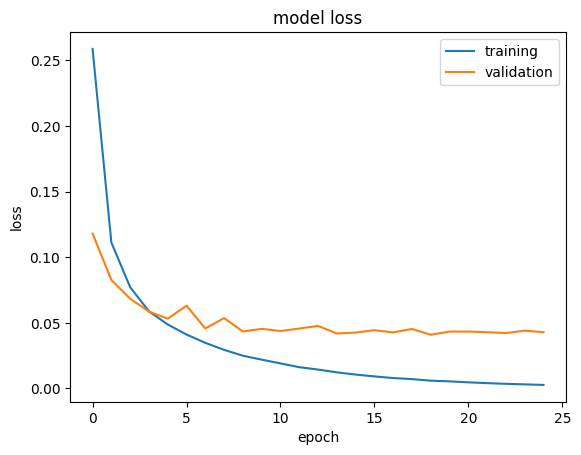

In [9]:
loss,accuracy = model.evaluate(testX, testY, verbose = True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc = 'best')
plt.show()

In [10]:
y_pred = model.predict(testX)

Y_pred = np.argmax(y_pred, 1) # Decode predicted labels
Y_test = np.argmax(testY, 1) # Decode labels

mat = confusion_matrix(Y_test,Y_pred) # generating the confusion matrix
print(mat)

313/313 [==============================] - 1s 1ms/step
[[ 971    0    1    0    0    1    2    1    3    1]
 [   0 1130    3    0    0    0    1    0    1    0]
 [   1    1 1020    0    1    0    2    3    4    0]
 [   0    0    2  996    0    4    0    3    2    3]
 [   0    1    2    0  972    0    1    0    0    6]
 [   1    0    0    7    0  880    2    0    1    1]
 [   5    2    1    1    1    2  945    0    1    0]
 [   0    3    6    0    2    0    0 1012    2    3]
 [   3    0    2    1    0    1    0    1  961    5]
 [   1    3    0    2    9    1    0    4    4  985]]


In [11]:
import pickle
with open('CNN_Model.pkl','wb') as file:
  pickle.dump(model,file)